# YOLO

1. YOLO 모델의 이해
   - Object Detection이 무엇인가? : 사진 내에서 각 객체를 찾고, 그 위치(좌표)까지 파악할 수 있는 것
   - YOLO11n(nano)은 어떤 데이터를 학습한 것인가 : coco dataset을 사전학습 함(어떤 class를 학습 했는지 확인)

2. 내 이미지로 YOLO11n 모델 예측하기

3. 유튜브 URL YOLO11n 실시간 예측하기

4. 데이터 만드는 방법
   - 좋은 데이터를 만들기 위해 어떻게 해야 하는가? : 라벨링을 공통 형식으로 진행(머리 | 몸통 포함)
   
5. 데이터 학습하기 
   - 성능 지표 설명하기

In [ ]:
# uv add ultralytics
from ultralytics import YOLO

from dotenv import load_dotenv, find_dotenv
import os

load_dotenv(find_dotenv())

model = YOLO('../../temp/yolo11n.pt') #yolo11n 부분은 모델명을 적어야 함 / coco dataset을 학습한 모델
model

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C3k2(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_

## 1. 이미지 예측

In [ ]:
# image 하나로 예측하기 

# results : 이미지 개수만큼 리스트로 담겨 있었다 len(results)
# result = results[0] : 첫번째 이미지 결과
# result.names : 모델이 찾을 수 있는 객체 dict(coco dataset이 학습한 종류)
# result.boxes : 객체 인식한 박스 정보들이 들어가 있음

# boxes.cls : 객체 예측한 결과 (1., 0., 7.) => tensor값(item() | int() 변환 필요)
# boxes.conf : 예측 신뢰도
# boxes.data : 박스좌표(x1, y1, x2, y2), 신뢰도(conf), 결과(cls)

results = model('../../data/image/yolo_image.jpg', save=True) # save하면 객체 탐지 결과 이미지 저장
print(type(results))
print('-' * 100)
print(len(results))
print('-' * 100)
print(results)


image 1/1 c:\walker\code\deep-learning-models\models\yolo\..\..\data\image\yolo_image.jpg: 448x640 7 persons, 3 bicycles, 1 umbrella, 60.6ms
Speed: 1.4ms preprocess, 60.6ms inference, 0.8ms postprocess per image at shape (1, 3, 448, 640)
Results saved to C:\walker\code\deep-learning-models\runs\detect\predict4
<class 'list'>
----------------------------------------------------------------------------------------------------
1
----------------------------------------------------------------------------------------------------
[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'gi

In [60]:
boxes = results[0].boxes # 0번 이미지에서 탐지된 객체(box)들의 정보들
print(type(boxes))
print('-' * 100)
print(boxes.cls) # 탐지 객체의 종류 index(tensor type)
print('-' * 100)
print(boxes.conf) # 탐지 객체의 신뢰도
print('-' * 100)
boxes

<class 'ultralytics.engine.results.Boxes'>
----------------------------------------------------------------------------------------------------
tensor([ 1.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0., 25.,  0.])
----------------------------------------------------------------------------------------------------
tensor([0.9002, 0.8530, 0.8465, 0.8233, 0.6742, 0.6726, 0.5206, 0.4078, 0.3751, 0.3393, 0.2988])
----------------------------------------------------------------------------------------------------


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([ 1.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0., 25.,  0.])
conf: tensor([0.9002, 0.8530, 0.8465, 0.8233, 0.6742, 0.6726, 0.5206, 0.4078, 0.3751, 0.3393, 0.2988])
data: tensor([[6.2712e+02, 3.9485e+02, 1.0357e+03, 7.7144e+02, 9.0023e-01, 1.0000e+00],
        [3.8486e+02, 2.1434e+02, 5.8382e+02, 7.4489e+02, 8.5297e-01, 0.0000e+00],
        [3.1211e+02, 4.2675e+02, 6.2185e+02, 7.6588e+02, 8.4648e-01, 1.0000e+00],
        [2.0947e+01, 3.8343e+02, 2.8015e+02, 6.5619e+02, 8.2332e-01, 1.0000e+00],
        [8.3186e+02, 1.8188e+02, 1.0133e+03, 7.0348e+02, 6.7417e-01, 0.0000e+00],
        [1.1804e+02, 2.4416e+02, 2.8153e+02, 6.3568e+02, 6.7262e-01, 0.0000e+00],
        [5.9368e+02, 2.1384e+02, 7.9385e+02, 6.7300e+02, 5.2062e-01, 0.0000e+00],
        [3.4311e+02, 2.6228e+02, 4.2485e+02, 4.9047e+02, 4.0778e-01, 0.0000e+00],
        [5.9131e+02, 2.1500e+02, 7.9470e+02, 4.3146e+02, 3.7509e-01, 0.0000e+00],
        [3.3718e+02, 2.113

In [61]:
names = results[0].names # 탐지할 수 있는 객체들
names

{0: 'person',
 1: 'bicycle',
 2: 'car',
 3: 'motorcycle',
 4: 'airplane',
 5: 'bus',
 6: 'train',
 7: 'truck',
 8: 'boat',
 9: 'traffic light',
 10: 'fire hydrant',
 11: 'stop sign',
 12: 'parking meter',
 13: 'bench',
 14: 'bird',
 15: 'cat',
 16: 'dog',
 17: 'horse',
 18: 'sheep',
 19: 'cow',
 20: 'elephant',
 21: 'bear',
 22: 'zebra',
 23: 'giraffe',
 24: 'backpack',
 25: 'umbrella',
 26: 'handbag',
 27: 'tie',
 28: 'suitcase',
 29: 'frisbee',
 30: 'skis',
 31: 'snowboard',
 32: 'sports ball',
 33: 'kite',
 34: 'baseball bat',
 35: 'baseball glove',
 36: 'skateboard',
 37: 'surfboard',
 38: 'tennis racket',
 39: 'bottle',
 40: 'wine glass',
 41: 'cup',
 42: 'fork',
 43: 'knife',
 44: 'spoon',
 45: 'bowl',
 46: 'banana',
 47: 'apple',
 48: 'sandwich',
 49: 'orange',
 50: 'broccoli',
 51: 'carrot',
 52: 'hot dog',
 53: 'pizza',
 54: 'donut',
 55: 'cake',
 56: 'chair',
 57: 'couch',
 58: 'potted plant',
 59: 'bed',
 60: 'dining table',
 61: 'toilet',
 62: 'tv',
 63: 'laptop',
 64: 'mou

In [62]:
print(names)
print('-' * 100)
print(boxes.cls)
print('-' * 100)
for cls_idx in boxes.cls:
    print(names.get(cls_idx.item()))

{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell phone', 68: 'microw

In [63]:
for x1, y1, x2, y2, conf, cls in boxes.data: # 박스 좌표, 신뢰도, 결과(idx)
    print(x1, y1, x2, y2, conf, cls)

tensor(627.1171) tensor(394.8538) tensor(1035.6875) tensor(771.4446) tensor(0.9002) tensor(1.)
tensor(384.8632) tensor(214.3356) tensor(583.8155) tensor(744.8948) tensor(0.8530) tensor(0.)
tensor(312.1060) tensor(426.7474) tensor(621.8453) tensor(765.8849) tensor(0.8465) tensor(1.)
tensor(20.9471) tensor(383.4302) tensor(280.1525) tensor(656.1851) tensor(0.8233) tensor(1.)
tensor(831.8597) tensor(181.8790) tensor(1013.2870) tensor(703.4780) tensor(0.6742) tensor(0.)
tensor(118.0357) tensor(244.1564) tensor(281.5349) tensor(635.6759) tensor(0.6726) tensor(0.)
tensor(593.6768) tensor(213.8430) tensor(793.8538) tensor(672.9994) tensor(0.5206) tensor(0.)
tensor(343.1068) tensor(262.2825) tensor(424.8450) tensor(490.4669) tensor(0.4078) tensor(0.)
tensor(591.3116) tensor(214.9956) tensor(794.6976) tensor(431.4563) tensor(0.3751) tensor(0.)
tensor(337.1822) tensor(211.3644) tensor(538.2481) tensor(304.1340) tensor(0.3393) tensor(25.)
tensor(118.5022) tensor(243.6358) tensor(281.3510) tensor(

## 2. 영상 불러와서 객체 탐지하기

In [64]:
video_link = 'https://youtu.be/bS1VQllcmI4'

results = model(video_link, stream=True, show=True)
results

<generator object BasePredictor.stream_inference at 0x000001A761CA3ED0>

## 3. 내 이미지로 예측하기

### 1) 데이터 불러오기

In [65]:
# uv add roboflow
# https://roboflow.com/ 웹에서 어노테이션 처리 이후 train/test/validation 분리
from roboflow import Roboflow

rf = Roboflow(api_key=ROBOFLOW_API_KEY)
project = rf.workspace("walker0625").project("dog-and-cat-dwyrh")
version = project.version(1)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...


### 2) 학습하기

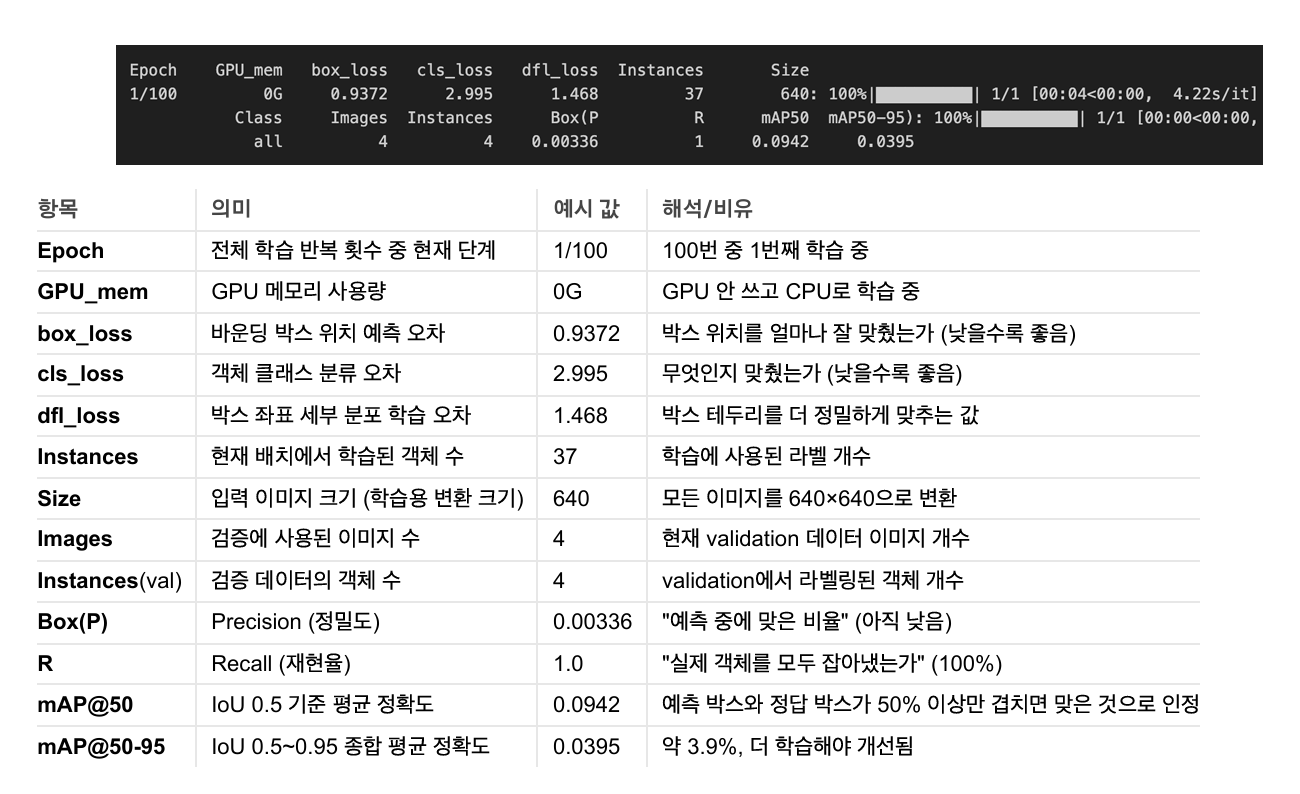

In [ ]:
results = model.train(data='dog-and-cat-1/data.yaml', epochs=100, imgsz=640)

Ultralytics 8.3.191  Python-3.10.18 torch-2.8.0+cpu CPU (Intel Core(TM) Ultra 9 185H)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dog-and-cat-1/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=../../temp/yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, 